# Initial anaysis of the scale sensor data

Import libraries to use in the project

In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt

from fbprophet import Prophet

from datetime import datetime, timedelta

from pmdarima.arima import auto_arima


Here we read the csv data

In [2]:
brew_data_df = pd.read_csv(os.path.join('data', '75556_brewmaster2_20200926211629_OgMbk0a3xO.csv'))
brew_data_df = brew_data_df.drop(columns=['temperature', 'grind', 'note'])

In [3]:
brew_data_df

,id,name,createdAt,tasty,total time,average flowrate,total weight,brew data
0,JmJ2por3Xk,parentsday3,2020/09/26 21:09:57,4,316,26.00,156.000000,0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0...
1,AHwGDvXm1Y,parentsday2,2020/09/26 20:57:10,4,716,3.53,24.700001,0.00;0.00;0.00;0.00;0.00;0.00;0.50;0.30;0.30;0...
2,S3cQCqyeJc,parentsday1,2020/09/26 20:31:05,4,942,2.67,24.000000,0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0...
3,pDK6FftRbo,test3,2020/09/26 16:48:18,4,1581,46.40,278.399994,0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0...
4,ENw2qHLsJG,test2,2020/09/22 15:15:50,4,2334,27.70,249.300003,53.20;53.20;0.00;0.00;0.00;0.00;0.00;0.00;0.00...
5,fAFmRC5wb7,test,2020/09/22 14:54:59,4,674,5.90,53.099998,0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0...
6,kSqTiIqCT4,tuesday1,2020/07/21 16:50:32,4,1398,42.90,643.500000,0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0...
7,a9PSHhDkbr,tuesday,2020/06/09 18:31:51,4,4590,1073.00,1073.000000,1073.00;1073.00;0.00;0.00;0.00;0.00;0.00;0.00;...
8,GIhIPyhIFh,hello2,2020/02/24 18:58:56,4,966,7.14,35.700001,0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0...
9,QOnLyVtLAC,hello,2020/02/24 16:16:50,4,4359,27.66,193.600006,0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0.00;0...


In [4]:
brew_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                13 non-null     object 
 1   name              13 non-null     object 
 2   createdAt         13 non-null     object 
 3   tasty             13 non-null     int64  
 4   total time        13 non-null     int64  
 5   average flowrate  13 non-null     float64
 6   total weight      13 non-null     float64
 7   brew data         13 non-null     object 
dtypes: float64(2), int64(2), object(4)
memory usage: 960.0+ bytes


### Raw data

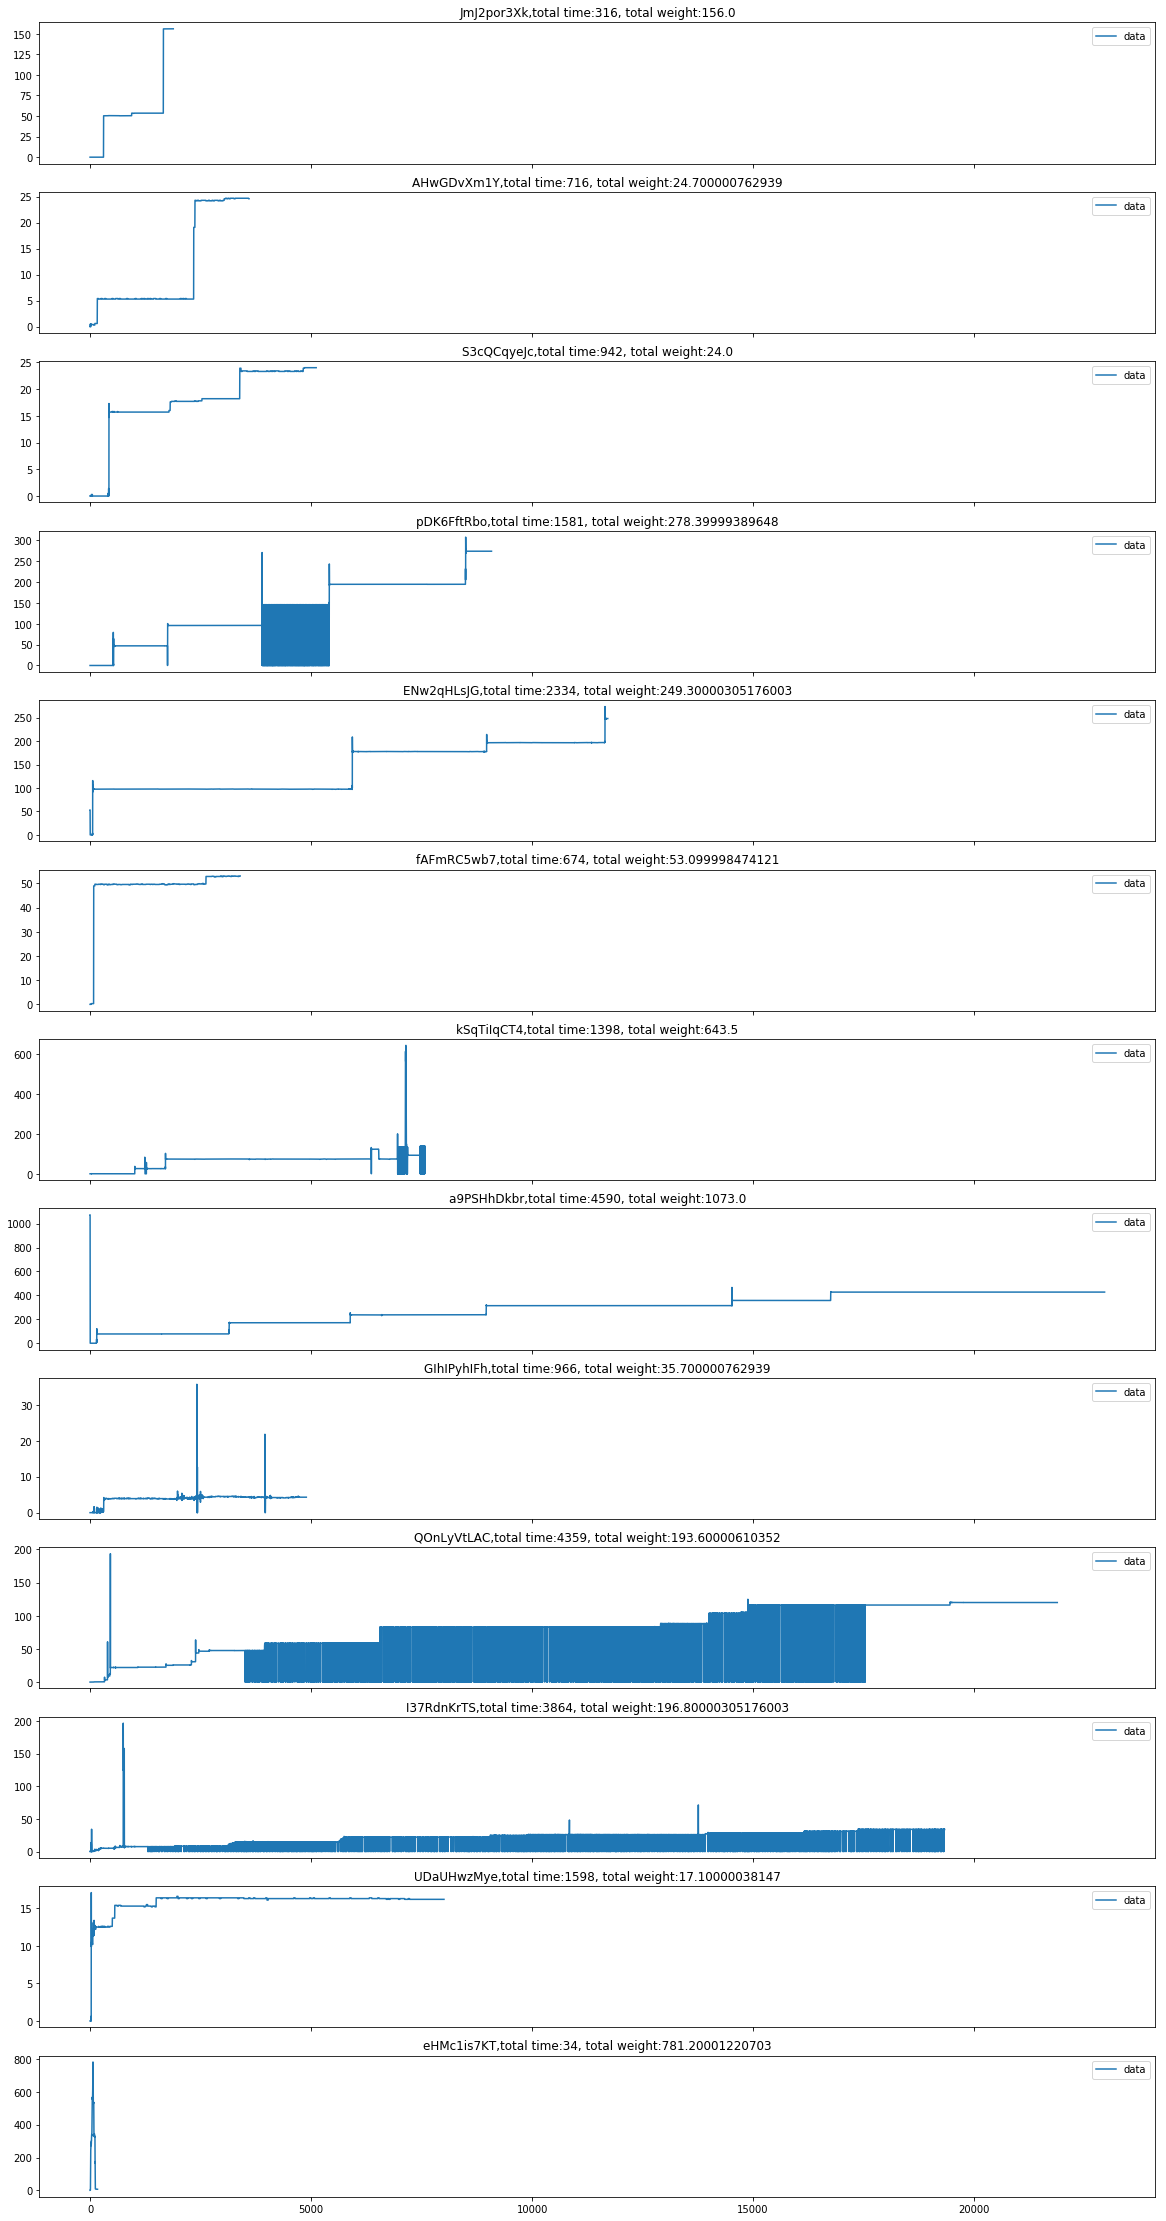

In [5]:
f, axes = plt.subplots(brew_data_df.shape[0], 1, figsize=(20,40), sharey='row', sharex='col')
axe = axes.ravel()

i=0
for id_,ex in brew_data_df.iterrows():
    #print(ex)
    data= ex['brew data'].split(';')
    data_num = [float(d) for d in data[:-1]]
    df = pd.DataFrame(data=data_num, columns=['data'])
    df.plot(ax=axe[i], title='{},total time:{}, total weight:{}'.format(ex['id'], ex['total time'], ex['total weight']))
    i+=1

## Smooth values

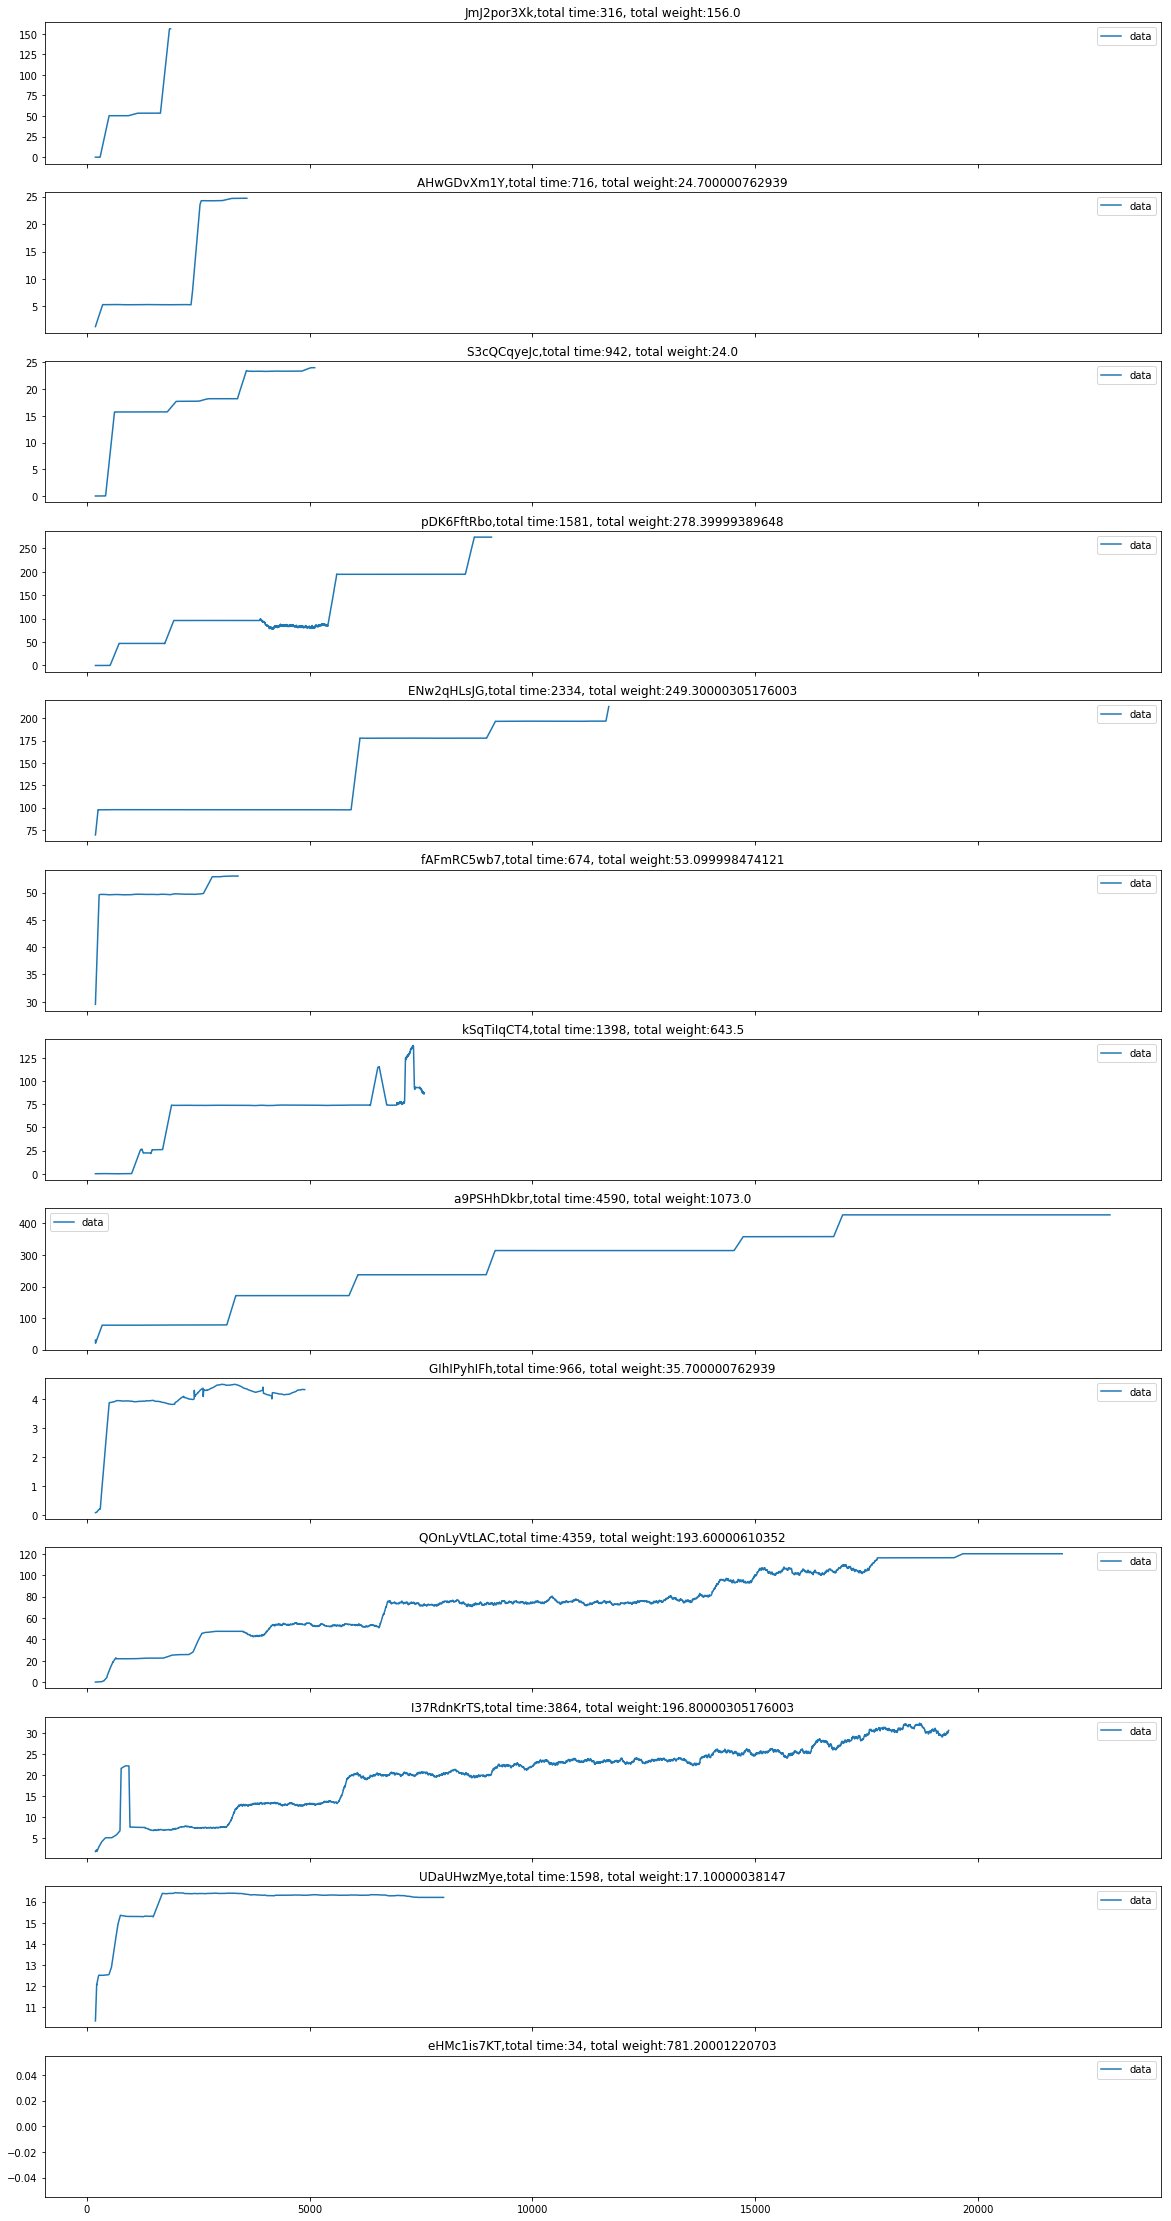

In [6]:
f, axes = plt.subplots(brew_data_df.shape[0], 1, figsize=(20,40), sharey='row', sharex='col')
axe = axes.ravel()



i=0
for id_,ex in brew_data_df.iterrows():
    #print(ex)
    data= ex['brew data'].split(';')
    data_num = [float(d) for d in data[:-1]]
    df = pd.DataFrame(data=data_num, columns=['data'])
    
    """
    smoother = KalmanSmoother(component='level_longseason', 
                          component_noise={'level':0.1, 'longseason':0.1}, 
                          n_longseasons=365)
    smoother.smooth(df[['data']].T)
    smooth_df = pd.DataFrame(data=smoother.smooth_data[0], index= df.index, columns=['data'])
    """
    
    smooth_df = df.rolling(window=200).mean()
    
    smooth_df.plot(ax=axe[i], title='{},total time:{}, total weight:{}'.format(ex['id'], ex['total time'], ex['total weight']))
    i+=1

## Prediction mechanisms

# Prophet

We focus on one experiment

In [7]:
data= brew_data_df[brew_data_df['id']=='a9PSHhDkbr']['brew data'].values[0].split(';')

Prepare the data for propeth

In [8]:
data_num = [float(d) for d in data[:-1]]
df = pd.DataFrame(data=data_num, columns=['y'])

In [9]:
delta = timedelta(microseconds=20000)

times = []
now= datetime.today()

#current time
for i in range(0, df.shape[0]):
    times.append(now)#.strftime('%H:%M:%S'))
    now += delta

#times to predict
future = []
for i in range(0, 10000):
    future.append(now)#.strftime('%H:%M:%S'))
    now += delta   

In [10]:
df['ds'] = times

In [11]:
df.tail()

,y,ds
22948,427.3,2021-02-25 00:00:55.052261
22949,427.3,2021-02-25 00:00:55.072261
22950,427.0,2021-02-25 00:00:55.092261
22951,427.1,2021-02-25 00:00:55.112261
22952,427.4,2021-02-25 00:00:55.132261


In [12]:
# define the model
model = Prophet()
# fit the model
model.fit(df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)

/home/fterroso/python/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.

/home/fterroso/python/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



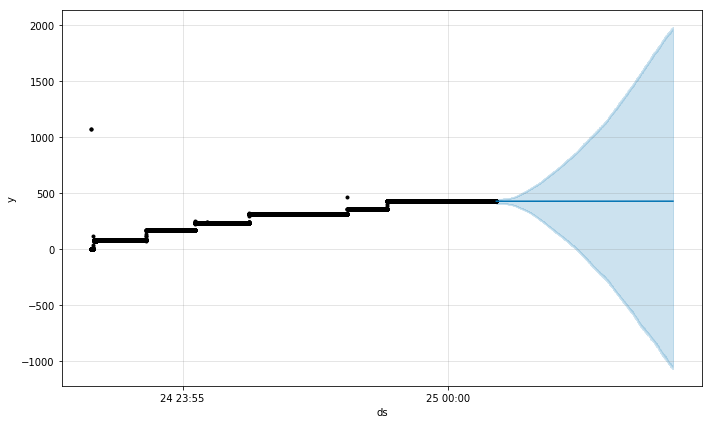

In [14]:
model.plot(forecast)
plt.show()

## Auto ARIMA

https://github.com/mkosaka1/AirPassengers_TimeSeries/blob/master/Time_Series.ipynb

In [15]:
df_ts = df.set_index('ds')

In [16]:
df_ts.shape[0]

22953

In [17]:
train = df_ts[:18000]
test = df_ts[18000:]

In [18]:
train

,y
ds,
2021-02-24 23:53:16.092261,1073.0
2021-02-24 23:53:16.112261,1073.0
2021-02-24 23:53:16.132261,0.0
2021-02-24 23:53:16.152261,0.0
2021-02-24 23:53:16.172261,0.0
...,...
2021-02-24 23:59:15.992261,427.3
2021-02-24 23:59:16.012261,427.3
2021-02-24 23:59:16.032261,427.3


In [19]:
model=auto_arima(train,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=128052.724, Time=0.81 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=127522.521, Time=7.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=14.80 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=128033.080, Time=0.87 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=127351.650, Time=12.94 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=127267.827, Time=27.11 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=127218.019, Time=45.13 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=127185.695, Time=95.11 sec


KeyboardInterrupt: 

In [ ]:
model.summary()


In [ ]:
prediction = pd.DataFrame(model.predict(n_periods = 30),index=test.index)
prediction.columns = ['predicted_passengers']
prediction

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
print("That's all folks")